<a href="https://colab.research.google.com/github/atanuchaudhury/DataScience/blob/main/cancerpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
logi=pd.read_csv("cancer.csv")  

In [97]:
logi.head(5)

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal1ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,0
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,0
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,0
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,0


In [98]:
logi.keys()

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swal1ing Difficulty',
       'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring',
       'Level'],
      dtype='object')

In [99]:
logi1= pd.get_dummies(logi, columns = ['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Passive Smoker','Chest Pain','Weight Loss','Wheezing','Swal1ing Difficulty','Clubbing of Finger Nails','Frequent Cold'])

In [100]:
logi1.head()

,Patient Id,Smoking,Coughing of Blood,Fatigue,Shortness of Breath,Dry Cough,Snoring,Level,Age_14,Age_17,Age_18,Age_19,Age_22,Age_23,Age_24,Age_25,Age_26,Age_27,Age_28,Age_29,Age_31,Age_32,Age_33,Age_34,Age_35,Age_36,Age_37,Age_38,Age_39,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_51,Age_52,Age_53,...,Weight Loss_1,Weight Loss_2,Weight Loss_3,Weight Loss_4,Weight Loss_5,Weight Loss_6,Weight Loss_7,Weight Loss_8,Wheezing_1,Wheezing_2,Wheezing_3,Wheezing_4,Wheezing_5,Wheezing_6,Wheezing_7,Wheezing_8,Swal1ing Difficulty_1,Swal1ing Difficulty_2,Swal1ing Difficulty_3,Swal1ing Difficulty_4,Swal1ing Difficulty_5,Swal1ing Difficulty_6,Swal1ing Difficulty_7,Swal1ing Difficulty_8,Clubbing of Finger Nails_1,Clubbing of Finger Nails_2,Clubbing of Finger Nails_3,Clubbing of Finger Nails_4,Clubbing of Finger Nails_5,Clubbing of Finger Nails_6,Clubbing of Finger Nails_7,Clubbing of Finger Nails_8,Clubbing of Finger Nails_9,Frequent Cold_1,Frequent Cold_2,Frequent Cold_3,Frequent Cold_4,Frequent Cold_5,Frequent Cold_6,Frequent Cold_7
0,P1,3,4,3,2,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,P10,2,3,1,7,7,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,P100,2,8,8,9,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,P1000,7,8,4,3,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,P101,8,9,3,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [101]:
from sklearn.model_selection import train_test_split #IMPORTING TEST TRAIN MODEL
y = logi1['Level']
X = logi1.drop(['Level'], axis = 1)
#x=logi1[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Passive Smoker','Chest Pain','Weight Loss','Wheezing','Swal1ing Difficulty','Clubbing of Finger Nails','Frequent Cold','Level']]
#y=logi1[['Patient Id']]
from sklearn.tree import DecisionTreeClassifier #CLASSIFIER MODEL IMPORTED
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=0) #SPLITING THE DATASET INTO TEST AND TRAIN SETS

In [102]:
from sklearn.tree import DecisionTreeClassifier
my_tree=DecisionTreeClassifier() # APPLYING CLASSIFIER MODEL
my_tree.fit(x_train,y_train) # TRAINNING THE DATASET


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [103]:
y_pred=my_tree.predict(x_test) #PREDICTING FROM THE TEST SETS

In [104]:
print(x_test)

     Age  Gender  Air Pollution  ...  Clubbing of Finger Nails  Frequent Cold  Level
993   37       2              7  ...                         5              6      0
859   48       2              6  ...                         9              3      0
298   23       1              3  ...                         4              6      0
553   25       2              4  ...                         4              6      0
672   33       1              2  ...                         1              2      1
..   ...     ...            ...  ...                       ...            ...    ...
679   36       2              2  ...                         1              3      0
722   52       1              3  ...                         3              2      1
215   26       2              7  ...                         7              2      0
653   19       1              6  ...                         4              3      0
150   45       2              1  ...                         3   

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred) # CONFUSION MATRIX IMPORTED AND APPLIED

array([[133,   0],
       [  0,  67]])

In [106]:
score=accuracy_score(y_test,y_pred)
score

1.0

In [107]:
cor=logi[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','OccuPational Hazards','Genetic Risk','chronic Lung Disease','Balanced Diet','Obesity','Passive Smoker','Chest Pain','Weight Loss','Wheezing','Swal1ing Difficulty','Clubbing of Finger Nails','Frequent Cold','Level']].corr()

In [108]:
cor

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Passive Smoker,Chest Pain,Weight Loss,Wheezing,Swal1ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,0.004908,0.012864,0.106946,-0.095354,-0.105833,0.039258,-0.012706,-0.096786
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,-0.184826,-0.218426,-0.057993,-0.076304,-0.058324,-0.034219,-0.000526,0.142881
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,0.606764,0.585734,0.258016,0.055368,-0.080918,0.241065,0.174539,-0.402653
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,0.592576,0.717242,0.207851,0.180817,-0.114073,0.414992,0.180778,-0.587038
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,0.560002,0.639983,0.321756,0.304850,0.031141,0.345714,0.219389,-0.683626
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,0.555311,0.775619,0.176226,0.178925,-0.002853,0.366447,0.077166,-0.575850
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,0.609071,0.831751,0.271743,0.204973,-0.062948,0.357815,0.087092,-0.572926
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,0.572698,0.782646,0.104080,0.057214,0.007279,0.298023,0.028759,-0.459490
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,0.725123,0.798207,-0.006544,0.063930,0.046807,0.041967,0.263931,-0.460569
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,0.681889,0.673150,0.313495,0.094287,0.127213,0.149093,0.288368,-0.638192


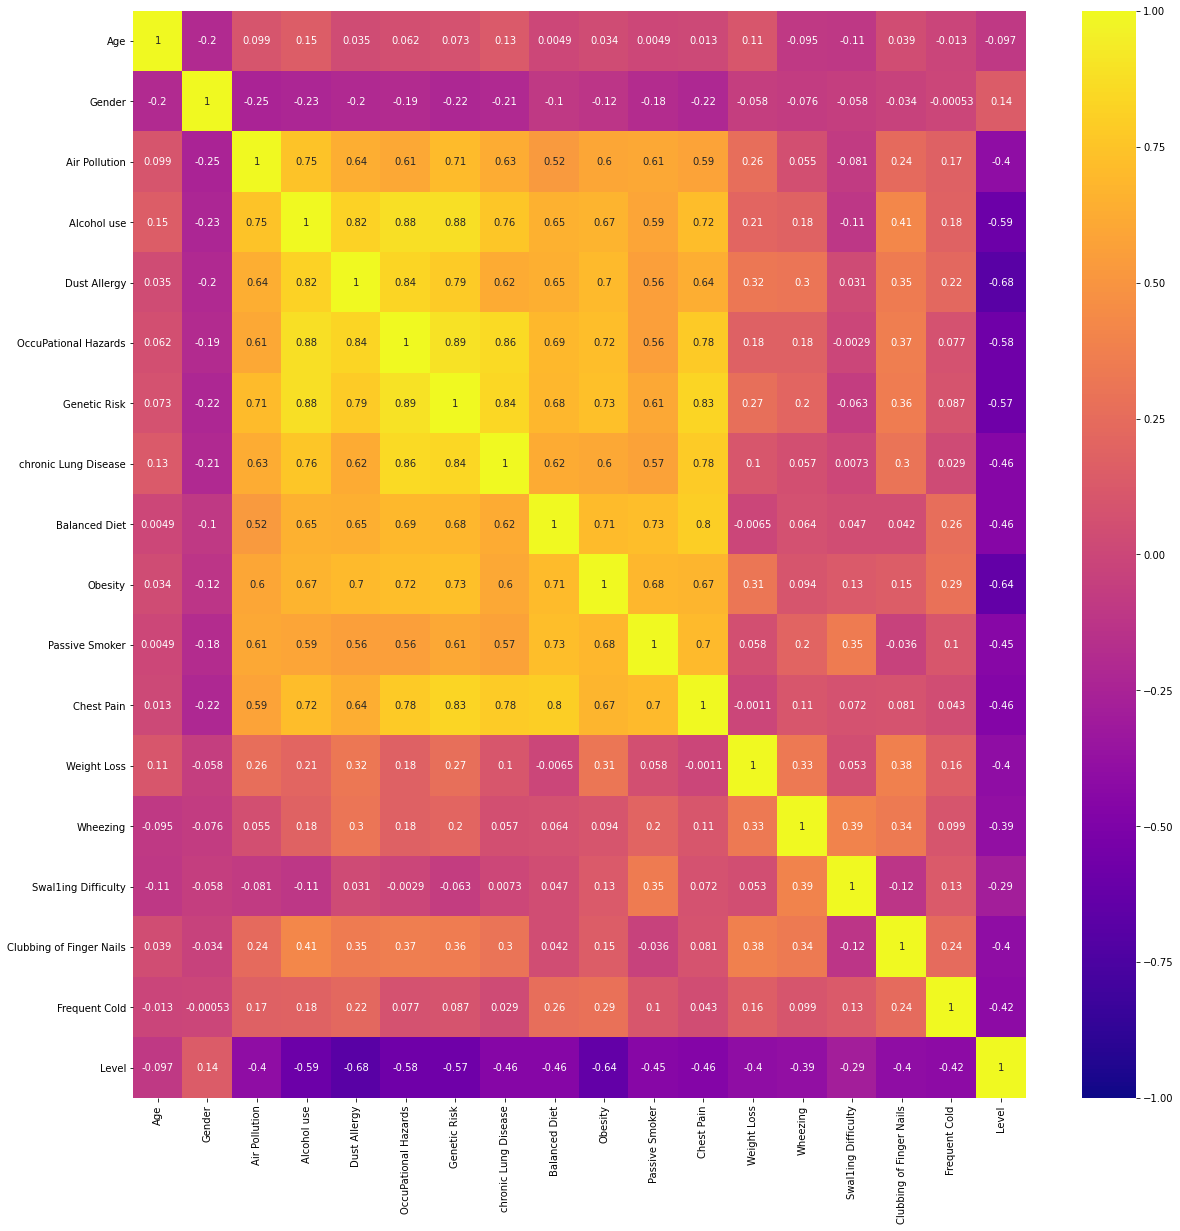

In [109]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)
